In [ ]:
!pip install yfinance
import yfinance as yf
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import sys
print(sys.executable)

import sys
print(sys.version)
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3
3.9.6 (default, Nov 11 2024, 03:15:38) 
[Clang 16.0.0 (clang-1600.0.26.6)]
/Library/Developer/CommandLineTools/usr/bin/python3


In [4]:
#fetching stock data of a company in this case Apple 'AAPL'
ticker = 'AAPL'
stock_data = yf.download(ticker, start= '2015-01-01', end= '2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [22]:
#Flatten MultiIndex columns
stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]

print(stock_data.head())  # Check if column names are now correct


            Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL  \
Date                                                                   
2015-01-02   24.347178  24.817063  23.906242  24.805927    212818400   
2015-01-05   23.661274  24.195741  23.474212  24.115571    257142000   
2015-01-06   23.663500  23.924052  23.300507  23.725854    263188400   
2015-01-07   23.995317  24.095529  23.761488  23.872835    160423600   
2015-01-08   24.917265  24.975166  24.206870  24.324899    237458000   

                Date_  Days_  
Date                          
2015-01-02 2015-01-02      0  
2015-01-05 2015-01-05      3  
2015-01-06 2015-01-06      4  
2015-01-07 2015-01-07      5  
2015-01-08 2015-01-08      6  


In [23]:
#selecting features and targets from the data
stock_data['Date'] = pd.to_datetime(stock_data.index)  # Ensure it's a datetime format
stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days  # Convert to numerical format

features = ['Open_AAPL', 'Volume_AAPL', 'Days'] #independant var
target = 'Close_AAPL'#dependant var - on indep


In [24]:
#Check for missing columns and drop null values
missing_cols = [col for col in features + [target] if col not in stock_data.columns]
if missing_cols:
    print(f"Error: Missing columns in stock_data: {missing_cols}")
else:
    # Drop missing values
    data = stock_data.dropna(subset=features + [target])
    X = data[features]
    y = data[target]

In [25]:
 #Train/test split, testing dataset with 20 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

In [26]:
#Evaluate model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 2.05
R-squared Score: 1.00


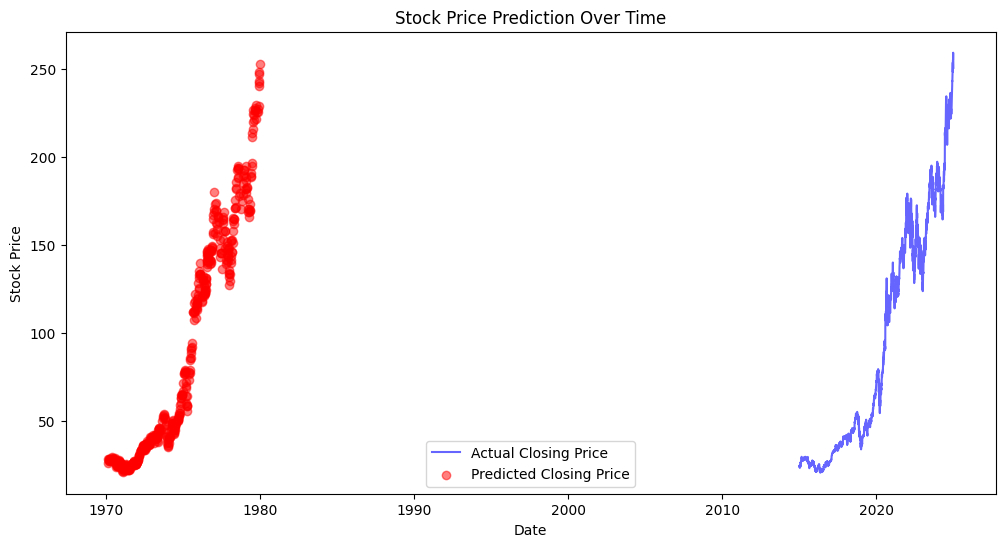

In [ ]:
#Plot actual vs predicted prices over time
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data[target], label="Actual Closing Price", color='blue', alpha=0.6)
plt.scatter(X_test['Days'], y_pred, label="Predicted Closing Price", color='red', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction Over Time")
plt.legend()
plt.show()

Predicted Closing Price on 2027-08-10: $252.82


/Users/prudhvileo/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


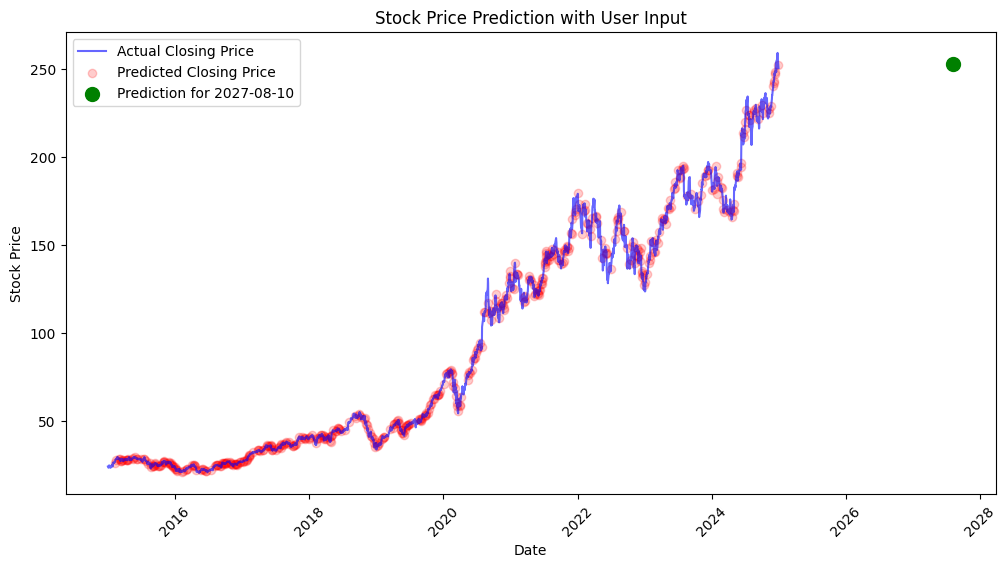

In [35]:
#Predict Closing Price for a User-Entered Input Date 
user_date = input("\nEnter a date (YYYY-MM-DD) to predict the closing price: ")
try:
    user_date = pd.to_datetime(user_date)
    user_days = (user_date - stock_data['Date'].min()).days

    # Use the latest Open price & Volume as features
    latest_open = stock_data.iloc[-1]['Open_AAPL']
    latest_volume = stock_data.iloc[-1]['Volume_AAPL']

    # Convert 'Days' back to Date for correct x-axis labels
    data['Plot_Date'] = pd.to_datetime('2015-01-01') + pd.to_timedelta(data['Days'], unit='D')
    X_test['Plot_Date'] = pd.to_datetime('2015-01-01') + pd.to_timedelta(X_test['Days'], unit='D')
    user_plot_date = pd.to_datetime('2015-01-01') + pd.to_timedelta(user_days, unit='D')

    # Make prediction
    user_pred = model.predict([[latest_open, latest_volume, user_days]])[0]
    print(f"Predicted Closing Price on {user_date.date()}: ${user_pred:.2f}")

    # Plot with Correct Dates
    plt.figure(figsize=(12,6))
    plt.plot(data['Plot_Date'], data[target], label="Actual Closing Price", color='blue', alpha=0.6)
    plt.scatter(X_test['Plot_Date'], y_pred, label="Predicted Closing Price", color='red', alpha=0.2)
    plt.scatter(user_plot_date, user_pred, color='green', s=100, label=f"Prediction for {user_date.date()}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("Stock Price Prediction with User Input")
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.legend()
    plt.show()


except Exception as e:
    print(f"Invalid input: {e}")
